In [ ]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import *
from pprint import pprint

print(os.getcwd())

c:\Users\AlexMalo\Desktop\Servimatic\servimatic\Servimatic


# 1. Informació sobre taula mestre màquines

In [18]:
path = os.path.join(os.getcwd(), 'data', 'maestro_maquinas.csv')
cols =  [
    "MAQUINA", "CODMOD", "CODMAQ", "SERIE", "CODGRUP", "CODEMP", "CODBAR", "ADJUDICAR",
    "FSISTEMA", "CANJE", "NUMMAQCANJEV", "FECHACV", "NUMMAQCANJEN", "FECHACN", "CODEST",
    "FECHAESTADO", "ALQUILER", "FECHULTR", "CODCRIT", "RETENCION", "PORCENTAJE", "CARGAINI",
    "FECARGA", "FINSTCONTA", "MONEDAR", "CONTENT", "CONTSAL", "FULTENL", "RECUTOLV", "DIGCONT",
    "BILLETERO", "ACTIVBILLET", "FPROTECCION", "FCANJETRAMITE", "FRECIBOTRAMITE", "EMPFISCAL",
    "CONTENTULTENL", "CONTSALULTENL", "FECHAMANT", "FECHALIMPIEZA", "USRULTCAMREG", "FECULTCAMREG",
    "TIMESTAMP", "ID", "RetencionFija", "Kit", "TipoDispositivoID", "DispositivoID", "IdMaquinaTecnocenter"
]
df = pd.read_csv(path, sep=';', header= None, names=cols)
df_filtrat = df[['MAQUINA', 'CODMAQ', 'SERIE', 'CODEMP', 'FECHACV', 'CODEST', 'FECHAESTADO']]

# Basic df statistics
print("DataFrame Statistics:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Missing values per column:\n{df.isnull().sum()}")
print(f"Data types:\n{df.dtypes}")
df_filtrat.head()

DataFrame Statistics:
Number of rows: 30402
Number of columns: 49
Missing values per column:
MAQUINA                     0
CODMOD                      0
CODMAQ                      0
SERIE                       3
CODGRUP                     0
CODEMP                     44
CODBAR                  24875
ADJUDICAR                2278
FSISTEMA                 3497
CANJE                       0
NUMMAQCANJEV             5886
FECHACV                  5887
NUMMAQCANJEN             8334
FECHACN                  8339
CODEST                      0
FECHAESTADO                 1
ALQUILER                   35
FECHULTR                23287
CODCRIT                     0
RETENCION                   0
PORCENTAJE                  0
CARGAINI                 4143
FECARGA                  8776
FINSTCONTA              26032
MONEDAR                     0
CONTENT                    14
CONTSAL                    14
FULTENL                  4122
RECUTOLV                    0
DIGCONT                   234
BILLETE

C:\Users\AlexMalo\AppData\Local\Temp\ipykernel_32572\1410201748.py:11: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';', header= None, names=cols)


,MAQUINA,CODMAQ,SERIE,CODEMP,FECHACV,CODEST,FECHAESTADO
0,BI.119.99,119,99,200.0,NaN,90,2025-10-23 00:00:00
1,BI.121226.99,121226,99,200.0,NaN,90,2025-10-23 00:00:00
2,BI.121227.99,121227,99,200.0,NaN,90,2025-10-23 00:00:00
3,BWL2.685.24,685,24,401.0,2025-02-18 00:00:00,90,2025-10-23 00:00:00
4,BWL2.703.25,703,25,NaN,NaN,94,2025-10-23 00:00:00


## 1.1 Anàlisi de les diferents dates per desxifrar el seu significat

FER PLOTS DE DISTRIBUCIÓ DE LES DATES. 

# 2. Anàlisi significat del valor *Bet* , i correlació amb desbancada

#### Utilitzem la màquina POW2.2628.23, que va enregistrar una desbancada el 17 d'octubre

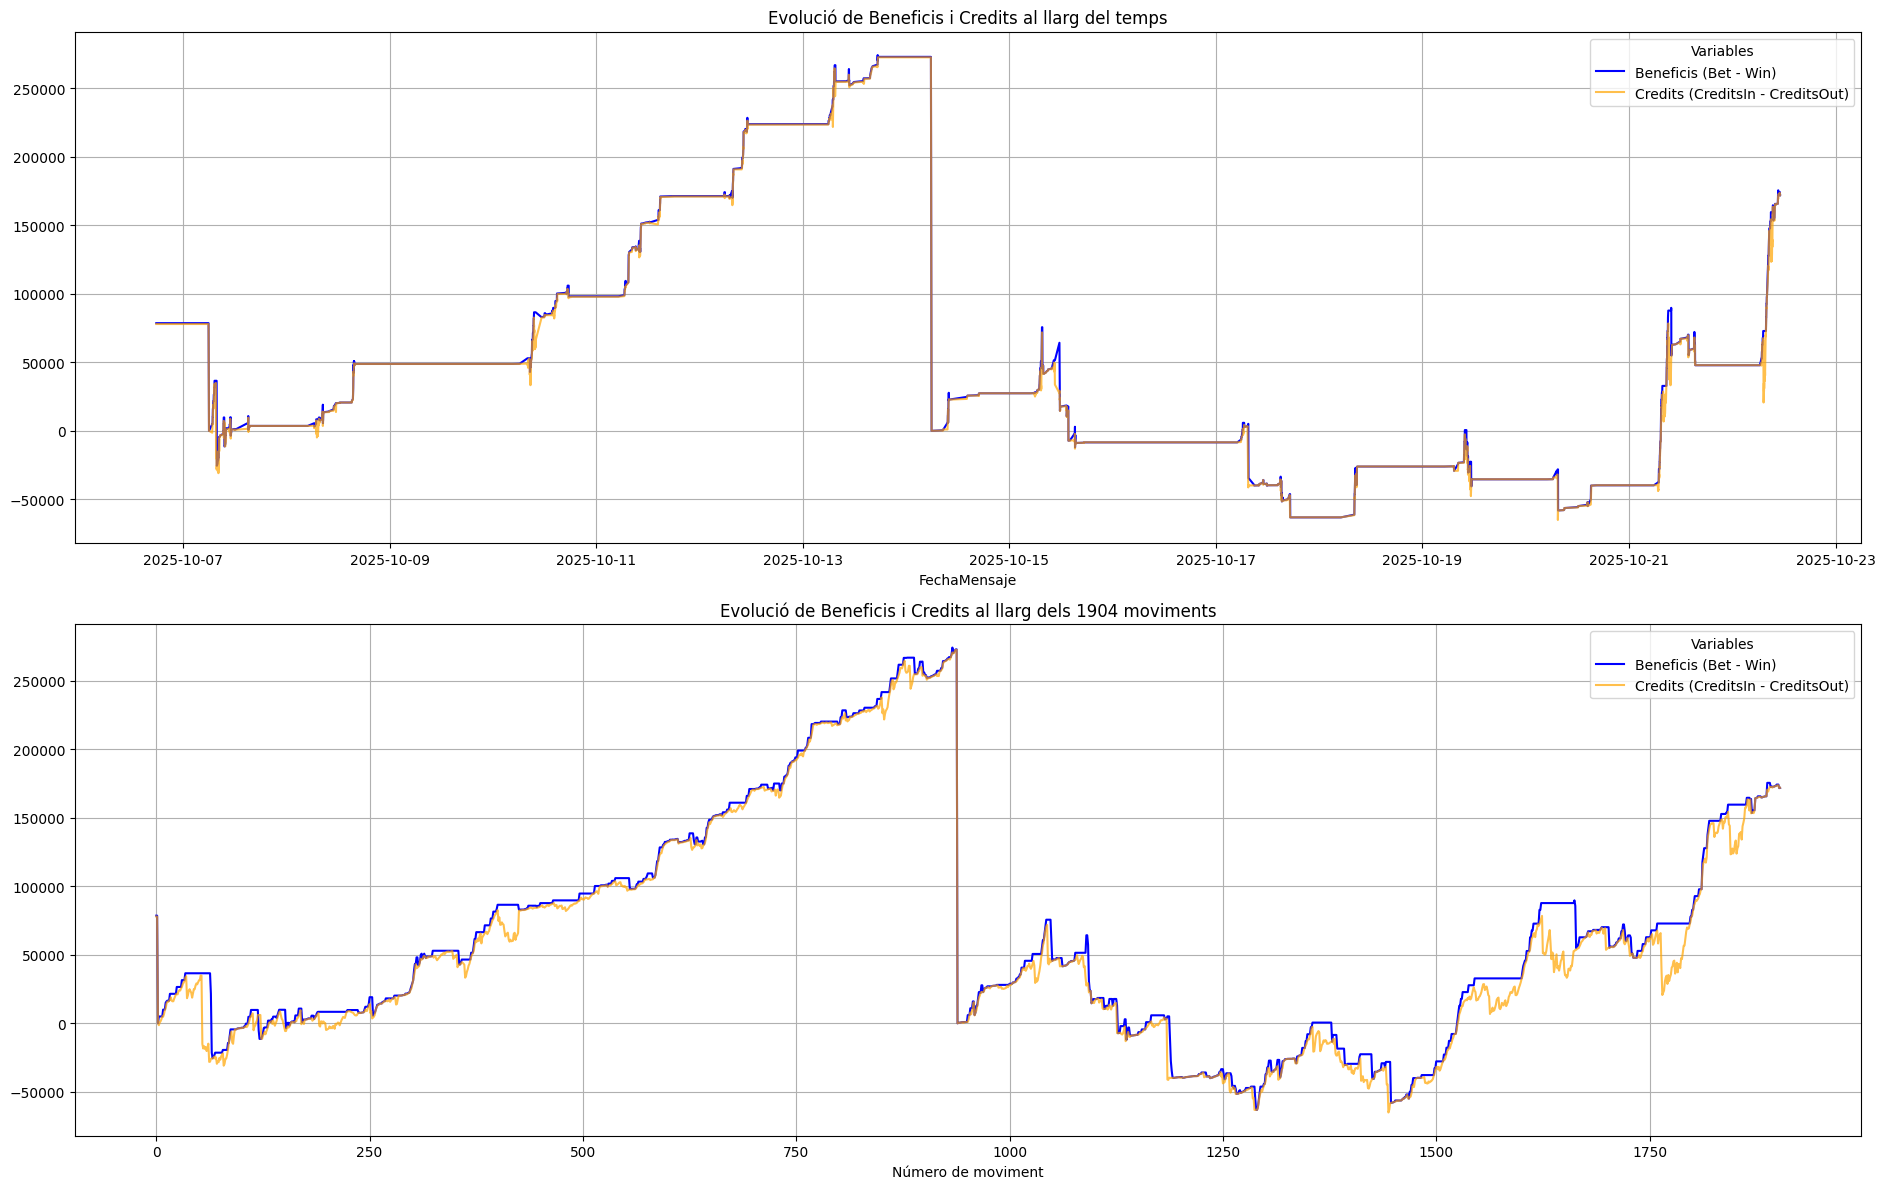

In [ ]:
# cridem a la classe per def EDA bàsic creada a 00_EDA_inicial_Mensajes.ipynb
from utilities import EDAinicial

path = os.path.join(os.path.dirname(os.getcwd()), 'data','Missatges_x_maquina', 'POW2.2628.23.csv')
test= EDAinicial(path)
test.load_and_process_data()
test.plot_beneficis_credits()

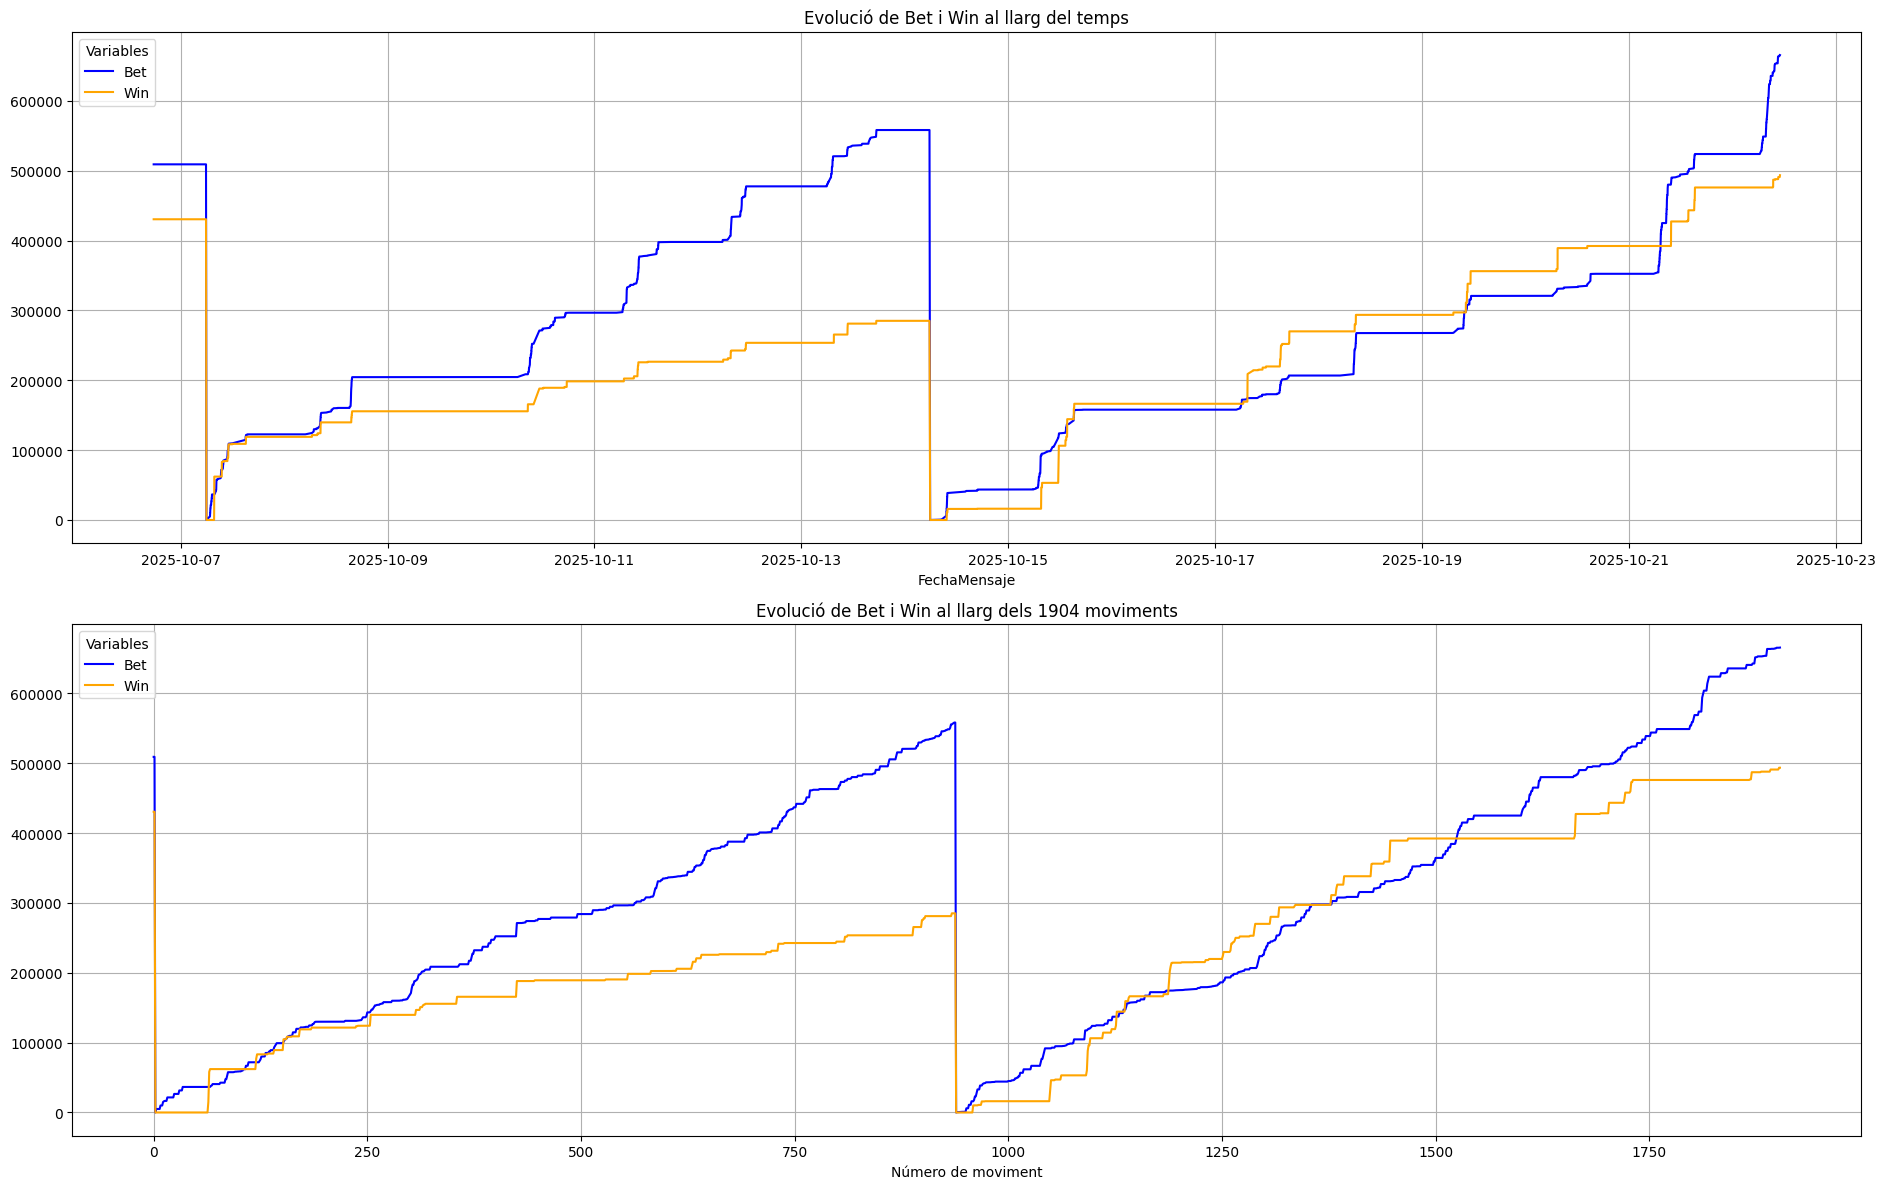

In [38]:
test.plot_bet_win()

In [36]:

pd.set_option('display.max_rows', 150)  # per a poder veure moles files sense que l'output es compacti

desbancada = test.df[test.df['FechaMensaje']>=datetime(2025,10,17, 7)][['Maquina', 'FechaMensaje', 'Bet', 'Win', 'Beneficis', 'Games', 'CreditsIn', 'CreditsOut', 'Credits']]
desbancada.head(150)

,Maquina,FechaMensaje,Bet,Win,Beneficis,Games,CreditsIn,CreditsOut,Credits
1183,POW2.2628.23,2025-10-17 07:18:19,172690,169320,3370,9774,408450,405495,2955
1184,POW2.2628.23,2025-10-17 07:20:20,172690,169320,3370,9817,409011,405596,3415
1185,POW2.2628.23,2025-10-17 07:29:21,174410,169320,5090,9873,410911,451966,-41055
1186,POW2.2628.23,2025-10-17 07:30:21,174410,169320,5090,9893,411511,452826,-41315
1187,POW2.2628.23,2025-10-17 07:31:21,174410,169320,5090,9929,413371,453066,-39695
1188,POW2.2628.23,2025-10-17 07:32:22,174410,186720,-12310,9948,414391,454286,-39895
1189,POW2.2628.23,2025-10-17 07:33:22,174410,202020,-27610,9948,414391,454286,-39895
1190,POW2.2628.23,2025-10-17 07:34:22,174410,208920,-34510,9948,414391,454286,-39895
1191,POW2.2628.23,2025-10-17 08:52:34,174410,213920,-39510,9948,414391,454286,-39895
1192,POW2.2628.23,2025-10-17 08:53:34,174410,214340,-39930,9948,414391,454286,-39895


<h2 style="color:#f39c12;"> Dades de la desbancada</h2>

**2025-10-17 09:36:00** -> s'envia missatge de desbancada

**2025-10-17 10:57:17** -> Es registra recàrrega i es tanca incidència de desbancada

<h2 style="color:#f39c12;"> Anàlisi del cas</h2>

Segons l'entés fins ara, el valor de Bet s'hauria de reiniciar quan es recarrega la desbancada. Veient el gràfic podem observar que els horaris no quadren, donat que Bet baixa a 0 el dia 14, **que no es va enregistrar cap desbancada ni recàrrega**. Per altra banda s'observa un altre caiguda del nivell de *Bet* a 0 el dia 7 d'octubre, i no consta cap incidència registrada a la bbdd.

Per tant, el primer pas es comprovar si simplement hi ha un desfàs entre els registres de les incidències i els de PartAccount, o el problema és més greu. 


Per a fer-ho, podem comprovar si el temps que la màquina està inactiva desde que *Bet* cau a 0 el dia 14 és el mateix que el temps que passa entre el registre de desbancada i el de recàrrega. 

**DIFERENCIA TEMPS EN SOLUCIONAR INCIDÈNCIES** : ~1:20h

In [ ]:
df_0 = test.df[(test.df['Bet']<100000) & (test.df['FechaMensaje'] > datetime(2025, 10, 10)) ]
df_0 = test.df.iloc[936:942]
df_0.head(10)

longitud del df: 138


,Maquina,FechaModificacion,FechaMensaje,ResetDateTime,Bet,Win,Games,HandPay,TestBet,TestWin,TestGames,TestHandPay,TestMode,MeterEvents,CreditsIn,CreditsOut,Beneficis,Credits
936,POW2.2628.23,2025-10-13 19:25:59.173,2025-10-13 17:25:50,2025-10-07T05:57:36,557430,285040,33293,0,0,0,0,0,False,0,1270262,998308,272390,271954
937,POW2.2628.23,2025-10-13 19:26:59.327,2025-10-13 17:26:50,2025-10-07T05:57:36,558130,285040,33315,0,0,0,0,0,False,0,1271248,998493,273090,272755
938,POW2.2628.23,2025-10-14 07:45:31.107,2025-10-14 05:45:22,2025-10-07T05:57:36,558130,285040,33315,0,0,0,0,0,False,0,1271248,998493,273090,272755
939,POW2.2628.23,2025-10-14 07:54:32.497,2025-10-14 05:54:23,2025-10-14T05:53:47,0,0,0,0,0,0,0,0,False,0,0,0,0,0
940,POW2.2628.23,2025-10-14 10:28:55.897,2025-10-14 08:28:46,2025-10-14T05:53:47,400,0,25,0,0,0,0,0,False,0,260,20,400,240
941,POW2.2628.23,2025-10-14 10:29:55.993,2025-10-14 08:29:47,2025-10-14T05:53:47,500,0,51,0,0,0,0,0,False,0,530,55,500,475


Donat que passen >2:30h desde que es dona la desbancada fins que es torna a jugar una partida, podria ser que aquesta desbancada fos la regsitrada a la bbdd el dia 17/10, però no ho podem confirmar. Podem observar els missatges que hi han al voltant dels dos resets de *Bet* per a veure si s'han resetejat per algun altres tipus d'incidència. 

In [63]:
df_a0 = test.df[(test.df['Bet']<50000)]
print(len(df_a0))
df_a0.head(5)

157


,Maquina,FechaModificacion,FechaMensaje,ResetDateTime,Bet,Win,Games,HandPay,TestBet,TestWin,TestGames,TestHandPay,TestMode,MeterEvents,CreditsIn,CreditsOut,Beneficis,Credits
2,POW2.2628.23,2025-10-07 07:58:22.413,2025-10-07 05:58:13,2025-10-07T05:57:36,0,0,0,0,0,0,0,0,False,0,0,0,0,0
3,POW2.2628.23,2025-10-07 08:43:29.180,2025-10-07 06:43:20,2025-10-07T05:57:36,5000,0,7,0,0,0,0,0,False,0,480,1848,5000,-1368
4,POW2.2628.23,2025-10-07 08:44:29.320,2025-10-07 06:44:20,2025-10-07T05:57:36,5000,0,54,0,0,0,0,0,False,0,3300,2688,5000,612
5,POW2.2628.23,2025-10-07 08:45:29.460,2025-10-07 06:45:20,2025-10-07T05:57:36,5000,0,89,0,0,0,0,0,False,0,5160,3669,5000,1491
6,POW2.2628.23,2025-10-07 08:46:29.597,2025-10-07 06:46:20,2025-10-07T05:57:36,5000,0,127,0,0,0,0,0,False,0,7060,4144,5000,2916


Observem que el primer reset és el 2025-10-07 a les 05:58:13

In [82]:
from utilities import parse_json
path = os.path.join(os.path.dirname(os.getcwd()), 'data','Missatges_x_maquina', 'POW2.2628.23.csv')
df_desbancada = pd.read_csv(path)
df_desbancada['Missatge_json'] = df_desbancada['Mensaje'].apply(parse_json)
df_desbancada1 = df_desbancada[df_desbancada['FechaMensaje']>'2025-10-07 05:52']
df_desbancada1.head()


,ID,MsgID,FechaMensaje,ReqID,SgID,Maquina,SGVer,ConexionTipoID,MensajeTipoID,Mensaje,FechaModificacion,UsuarioModificacion,Missatge_json
9,102211093,15,2025-10-07 05:52:12.000,0,202481591048624,POW2.2628.23,1.12.14-37,1,25,"{""TotalAccount"": {""Bet"": 46530120, ""Win"": 3668...",2025-10-07 07:52:21.567,golondrina,"{'TotalAccount': {'Bet': 46530120, 'Win': 3668..."
10,102211097,17,2025-10-07 05:52:14.000,0,202481591048624,POW2.2628.23,1.12.14-37,1,40,"{""EventsList"": [{""Egm"": 0, ""EventDateTime"": ""2...",2025-10-07 07:52:23.407,golondrina,"{'EventsList': [{'Egm': 0, 'EventDateTime': '2..."
11,102211808,24,2025-10-07 05:58:13.000,0,202481591048624,POW2.2628.23,1.12.14-37,1,25,"{""TotalAccount"": {""Bet"": 46530120, ""Win"": 3668...",2025-10-07 07:58:22.413,golondrina,"{'TotalAccount': {'Bet': 46530120, 'Win': 3668..."
12,102212241,29,2025-10-07 06:01:22.000,0,202481591048624,POW2.2628.23,1.12.14-37,1,40,"{""EventsList"": [{""Egm"": 0, ""EventDateTime"": ""2...",2025-10-07 08:01:31.117,golondrina,"{'EventsList': [{'Egm': 0, 'EventDateTime': '2..."
13,102217713,74,2025-10-07 06:43:20.000,0,202481591048624,POW2.2628.23,1.12.14-37,1,25,"{""TotalAccount"": {""Bet"": 46535120, ""Win"": 3668...",2025-10-07 08:43:29.180,golondrina,"{'TotalAccount': {'Bet': 46535120, 'Win': 3668..."


Obrim els missatges que hi ha just abans i després del reset:

In [81]:
pprint(df_desbancada.loc[10,'Missatge_json'])
print('\n')
pprint(df_desbancada.loc[12,'Missatge_json'])


{'EventsList': [{'Egm': 0,
                 'EventCode': 'DOR001',
                 'EventDateTime': '2025-10-07T05:52:14',
                 'EventInfo': 'Puerta superior abierta',
                 'EventType': 'Switch',
                 'Value': 0}]}


{'EventsList': [{'Egm': 0,
                 'EventCode': 'DOR002',
                 'EventDateTime': '2025-10-07T06:01:22',
                 'EventInfo': 'Puerta superior cerrada',
                 'EventType': 'Switch',
                 'Value': 0}]}


<h2 style="color:#f39c12;"> Important:</h2>

Sembla ser que al donarse events com obrir i tancar una porta, els contadors de *Bet* també es resetejen a 0. 

In [85]:
import importlib
import utilities
importlib.reload(utilities) # per actualitzar al nou fitxer
from utilities import AnalitzadorEstructuresJSON

json_desbancades = AnalitzadorEstructuresJSON(os.path.join(os.path.dirname(os.getcwd()), 'data', 'Missatges_x_maquina'))

json_desbancades.mostrar_json_maquina('POW2.2628.23')



📄 Estructura JSON per a la màquina 'POW2.2628.23':

{'MultiGameAccount': {'MultiGameMeters': [{'GameId': 1,
                                           'GameName': 'Sizzling Hot',
                                           'PartBet': 95000,
                                           'PartGames': 3773,
                                           'PartWin': 201140,
                                           'TotalBet': 2290799,
                                           'TotalGames': 68936,
                                           'TotalWin': 4057320},
                                          {'GameId': 2,
                                           'GameName': 'Lord of the Ocean',
                                           'PartBet': 25590,
                                           'PartGames': 750,
                                           'PartWin': 29420,
                                           'TotalBet': 3103643,
                                           'TotalGames': 87154,

## 2.2 Anàlisi resets de *Bet*

Analitzem quins son els factors que fan que es reseteji el valor de *Bet*. Fins ara teniem entés que era només quan es recarrega (o recauda) una màquina, però hem trobat indicis que porten a pensar que també es reseteja amb altres tipus d'events, com bé obrir i tancar una porta de la màquina. 

# 3. Anàlisi distribució de Desbancades

Investiguem la distribució de intervals de temps entre desbancades, i intentem trobar clusters entre les desbancades de màquines d'un mateix tipus.

Les conclusions extretes són importants perquè ens permetran saber quina granularitat de dades és la mínima que requerim. Si trobem que les desbancades es donen cada 3 dies, tenir informació sobre la evolució del cash diari no serà suficient. 

In [ ]:
# Parsing 'FECHA' to datetime:
# df_gtol['FECHA'] = df_gtol['FECHA'].str.replace(r'\.\d{3}$', '', regex=True)

## 3.1 Preprocessing

In [ ]:
path_gtolmov = os.path.join(os.path.dirname(os.getcwd()), 'data','Gtolmov.csv')
df_gtol = pd.read_csv(path_gtolmov)

# convertim columna 'FECHA' a datetime
df_gtol['FECHA'] = pd.to_datetime(df_gtol['FECHA'])

# Converteix cloumna 'IMPORTE' a enters
df_gtol['IMPORTE'] = df_gtol['IMPORTE'].str.replace(',', '.', regex=False).astype(float).astype(int)

# filtrem algunes dades irrelevants (d'abans de l'any 2000)
df_gtol = df_gtol[df_gtol['FECHA']>datetime(2005, 1, 1)]

print(df_gtol.info())
df_gtol.head()

C:\Users\AlexMalo\AppData\Local\Temp\ipykernel_15244\2011693092.py:2: DtypeWarning: Columns (6,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gtol = pd.read_csv(path_gtolmov)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307946 entries, 0 to 307945
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0.1        307946 non-null  int64         
 1   Unnamed: 0          307946 non-null  int64         
 2   MAQUINA             307946 non-null  object        
 3   FECHA               307946 non-null  datetime64[ns]
 4   CODMOD              307946 non-null  object        
 5   CODMAQ              307946 non-null  int64         
 6   SERIE               307946 non-null  object        
 7   IMPORTE             307946 non-null  object        
 8   OBSERPERD           307946 non-null  int64         
 9   CODEMPLE            307946 non-null  int64         
 10  CODEMP              307946 non-null  int64         
 11  OBSER               260116 non-null  object        
 12  CODGRUP             307946 non-null  int64         
 13  FECHACONTABILIZADO  307946 no

,Unnamed: 0.1,Unnamed: 0,MAQUINA,FECHA,CODMOD,CODMAQ,SERIE,IMPORTE,OBSERPERD,CODEMPLE,...,USRULTCAMREG,FECULTCAMREG,TIMESTAMP,IDCollect,TipoTolva,IDGtol,ID,Validado,FechaValidado,idAlbaran
0,0,0,CORS.458.99,1992-02-17,CORS,458,99,"120,20",0,0,...,SERVIDAT1\IVAN,2016-05-18 08:30:52.020,0x00000002D447FBF0,0,0,3511,17243,1,NaN,NaN
1,1,1,CTFA.4502.98,1998-05-27,CTFA,4502,98,"180,30",0,0,...,SERVIDAT1\IVAN,2016-05-18 08:30:52.020,0x00000002D447FBF1,0,0,7453,17244,1,NaN,NaN
2,2,2,CORS.2029.98,1998-11-02,CORS,2029,98,"180,30",0,0,...,SERVIDAT1\IVAN,2016-05-18 08:30:52.020,0x00000002D447FBF2,0,0,3467,17245,1,NaN,NaN
3,3,3,CORS.2444.98,1998-11-24,CORS,2444,98,"180,30",0,0,...,SERVIDAT1\IVAN,2016-05-18 08:30:52.020,0x00000002D447FBF3,0,0,3482,17246,1,NaN,NaN
4,4,4,CORS.571.99,2000-06-13,CORS,571,99,"240,40",0,0,...,SERVIDAT1\IVAN,2016-05-18 08:30:52.020,0x00000002D447FBF4,0,0,3521,17247,1,NaN,NaN


## 3.2 Anàlisi

### 3.2.1 Distribució temporal de dades

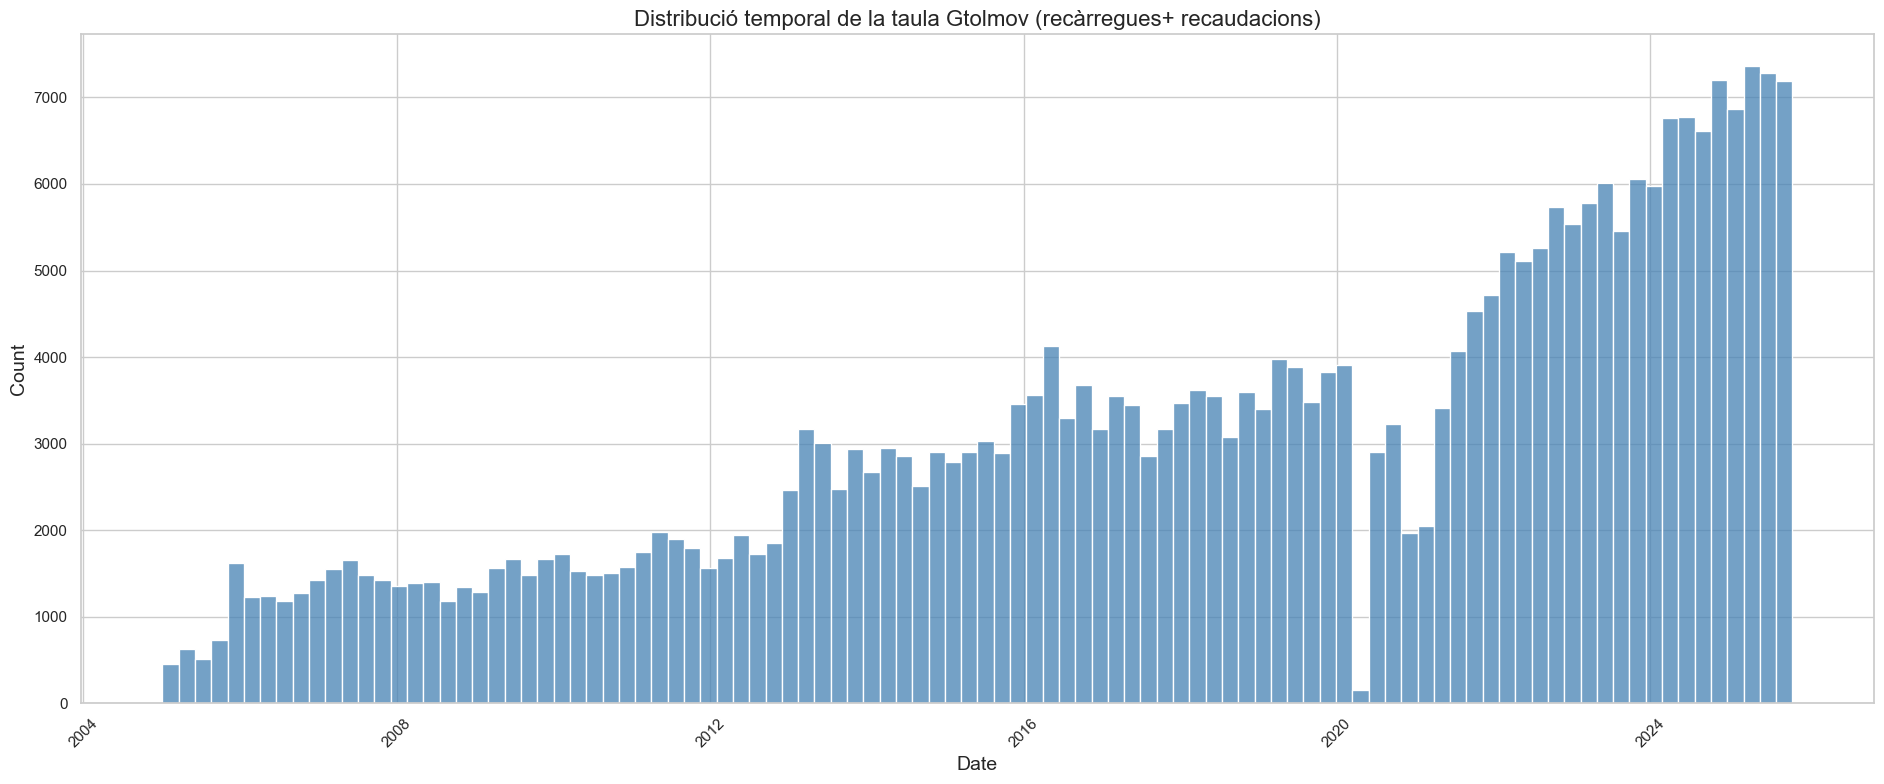

In [160]:
plt.figure(figsize=(19, 8))
sns.histplot(df_gtol['FECHA'], bins=100, color="steelblue")
plt.title("Distribució temporal de la taula Gtolmov (recàrregues+ recaudacions)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Separem en recàrregues i recaudacions

In [ ]:
df_pos= df_gtol[df_gtol['IMPORTE']>0]
df_neg= df_gtol[df_gtol['IMPORTE']<0]
df_0 = df_gtol[df_gtol['IMPORTE']==0]

print(f" Tenim {len(df_pos)} recàrregues. Això representa un {round(100*(len(df_pos)/len(df_gtol)),2)}% de les dades de la taula Gtolmov\n")
print(f" Tenim {len(df_neg)} recaudacions. Això representa un {round(100*(len(df_neg)/len(df_gtol)),2)}% de les dades de la taula Gtolmov\n")
print(f" Inesperadament, tenim {len(df_0)} càrregues amb import = 0. Això representa un {round(100*(len(df_0)/len(df_gtol)),2)}% de les dades de la taula Gtolmov")


 Tenim 117794 recàrregues. Això representa un 38.29% de les dades de la taula Gtolmov

 Tenim 189506 recaudacions. Això representa un 61.59% de les dades de la taula Gtolmov

 Inesperadament, tenim 372 càrregues amb import = 0. Això representa un 0.12% de les dades de la taula Gtolmov


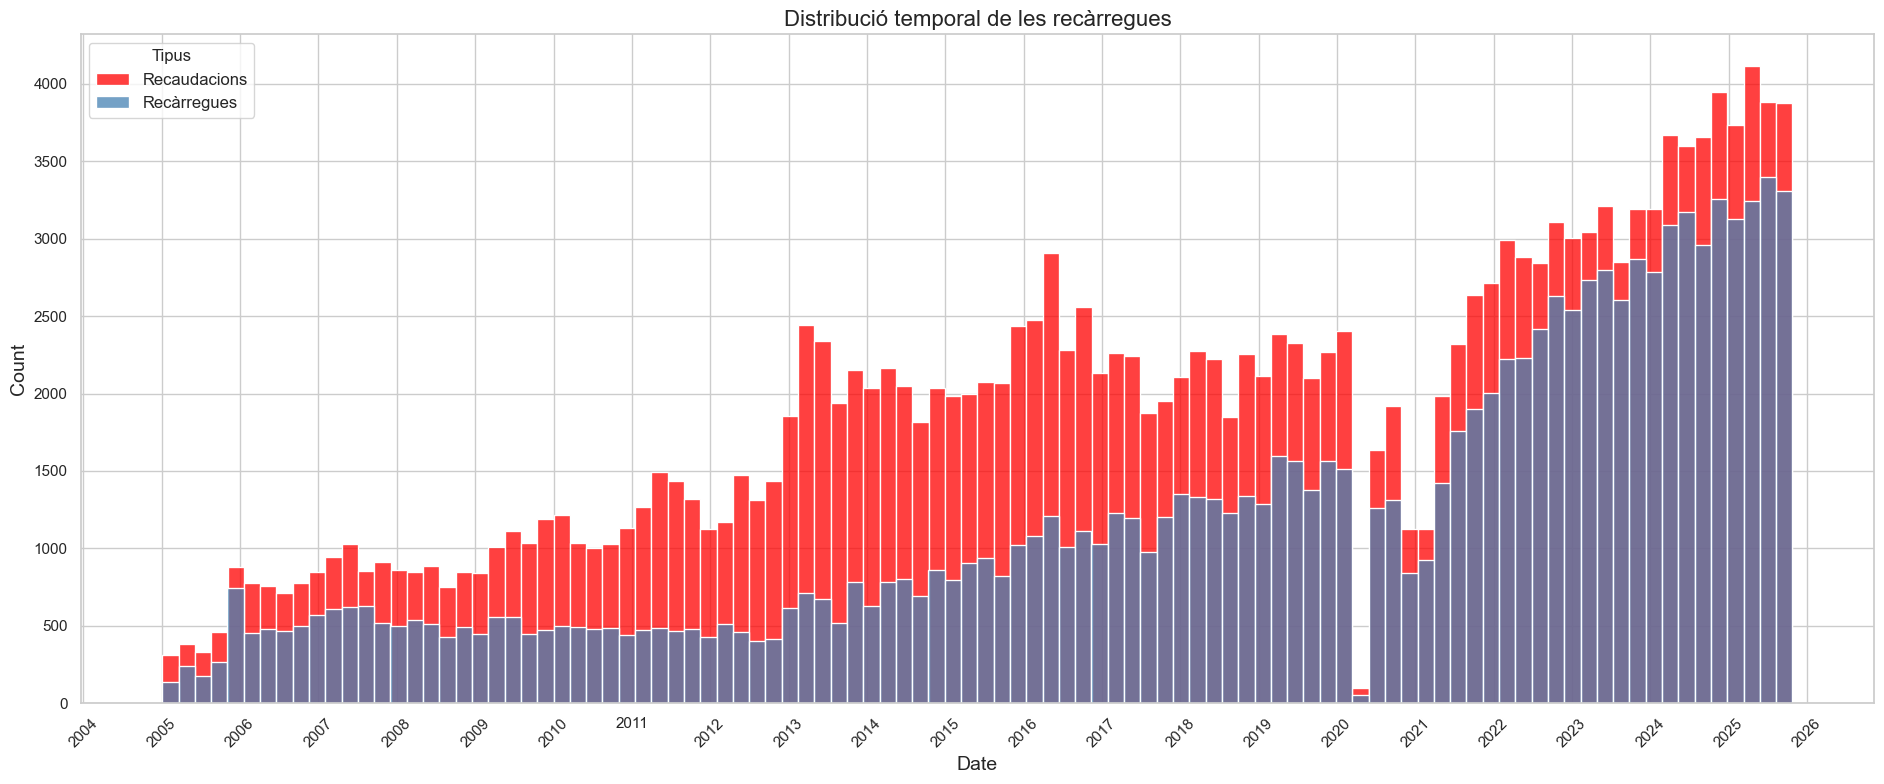

In [ ]:
plt.figure(figsize=(19, 8))

# Plot both histograms with labels
sns.histplot(df_neg['FECHA'], bins=100, color="red", label="Recaudacions")
sns.histplot(df_pos['FECHA'], bins=100, color="steelblue", label="Recàrregues")

# Add legend
plt.legend(title="Tipus", fontsize=12)

# Title and labels
plt.title("Distribució temporal de les recàrregues", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate ticks
plt.xticks(rotation=45)

# Add x-axis ticks every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


Distribució de quants registres tenim per cada màquina

In [177]:
df_gtol_maqs = df_gtol['MAQUINA'].value_counts()

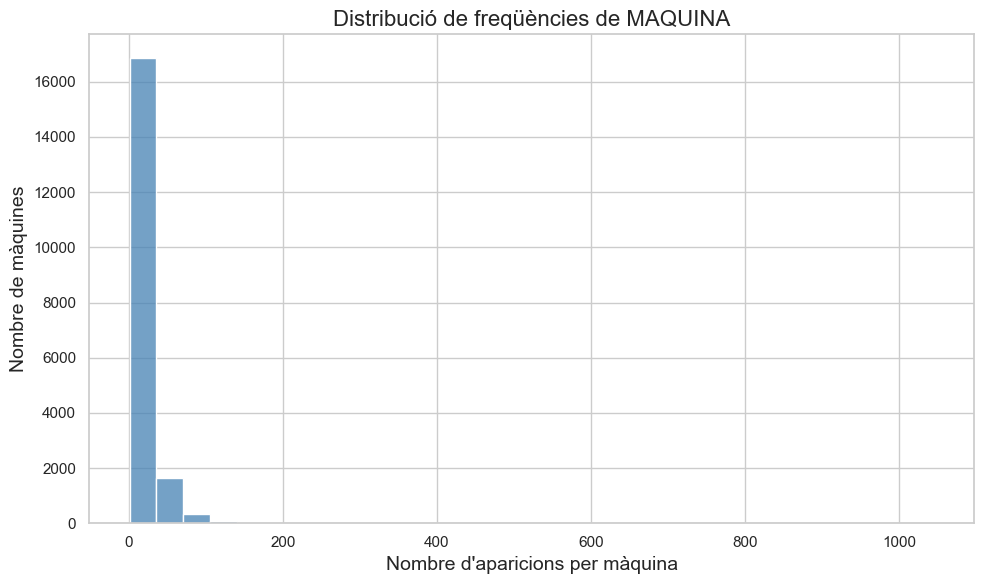

In [178]:

# Get the frequency of each machine
counts = df_gtol['MAQUINA'].value_counts()

# Plot the distribution of these counts
plt.figure(figsize=(10, 6))
sns.histplot(counts, bins=30, color="steelblue")

# Customize
plt.title("Distribució de freqüències de MAQUINA", fontsize=16)
plt.xlabel("Nombre d'aparicions per màquina", fontsize=14)
plt.ylabel("Nombre de màquines", fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
df_gtol_maqs.hist()

Una cosa interessant per veure es la distribució del span temporal de cada màquina, per trobar quines màquines estàn actives i quines no. 

each row of my df is a machine, and now i want to look at the distribution of the temporal span of my machines. I want to know when machines activity started and ended. note that i have 